In [7]:
!unzip -q '/content/drive/MyDrive/project/Dataset/Cat_Dog_Train_Dataset1.zip'

replace Cat_Dog_Train_Dataset/cats/cat.1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [8]:
# Import the Necessary Library 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense,Activation,MaxPooling2D
from keras import backend as k
import cv2
import os

**Step-1-Load The Dataset**

In [9]:
#Describe the Path  And Load The Dataset 
dir="/content/Cat_Dog_Train_Dataset"
Categories=['cats','dogs']

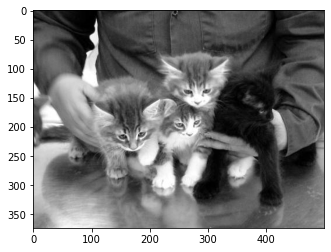

In [10]:
for category in Categories:# there are to categories, dogs and cats
  path=os.path.join(dir,category)# create path to dogs and cats
  for img in os.listdir(path): # iterate over each image per dogs and cats
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # convert to array
    plt.imshow(img_array,cmap="gray") # graph it
    plt.show() # display!
    break# we just want one for now so break
  break

In [11]:
print(img_array)

[[ 37  43  52 ...  46  45  44]
 [ 38  42  49 ...  51  50  49]
 [ 40  42  45 ...  50  49  48]
 ...
 [140 139 137 ... 158 159 159]
 [135 134 132 ... 143 145 146]
 [125 125 125 ... 133 135 137]]


In [12]:
print(img_array.shape)

(374, 500)


**step-2-Looking at the Images on Dataset**

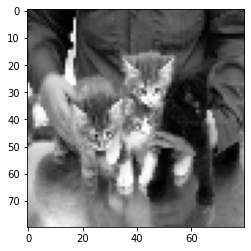

In [13]:
img_size=80
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')

In [14]:
img_size=80
training_data=[]
def create_training_data():
  for category in Categories:
    path=os.path.join(dir,category)
    class_num=Categories.index(category)
    for img in os.listdir(path):
      try:      
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_training_data()     

In [15]:
print(len(training_data))

8005


In [16]:
import random
random.shuffle(training_data)

In [17]:
x=[]
y=[]

In [18]:
for features ,labels in training_data:
  x.append(features)
  y.append(labels)

In [19]:
x=np.array(x).reshape(-1,img_size,img_size,1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Step-3-Examine the Size And Dimension of theh dataset**

In [21]:
print(x_train.shape)
print('Initial shape or dimension of x_train ',str(x_train.shape))
print("Number of samples in our training data:" +str(len(x_train)))
print("Number of labels in our training data:" +str(len(y_train)))
print("Number of samples in our training data:" +str(len(x_test)))
print("Number of samples in our training data:" +str(len(y_test)))
print("    ")
print("Dimensions of x_train:" + str(x_train[0].shape))
#print("labels of x_train:" + str(y_train.shape))
print("   ")
print("Dimensions of x_test:" + str(x_test[0].shape))
#print("labels of x_test:" + str(y_test.shape))

(5603, 80, 80, 1)
Initial shape or dimension of x_train  (5603, 80, 80, 1)
Number of samples in our training data:5603
Number of labels in our training data:5603
Number of samples in our training data:2402
Number of samples in our training data:2402
    
Dimensions of x_train:(80, 80, 1)
   
Dimensions of x_test:(80, 80, 1)


**Step-4-Preparing Our Dataset For Training**

In [22]:
#Let Store the number rows and columns 
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

In [23]:
#Get the dataset in the right shape wee t to reshape it 
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [24]:
print(x_train)
print(x_test)

[[[[ 77]
   [ 92]
   [100]
   ...
   [181]
   [136]
   [136]]

  [[ 81]
   [ 90]
   [ 81]
   ...
   [156]
   [134]
   [105]]

  [[ 89]
   [ 90]
   [ 95]
   ...
   [146]
   [110]
   [116]]

  ...

  [[ 98]
   [103]
   [ 95]
   ...
   [151]
   [147]
   [142]]

  [[106]
   [103]
   [ 95]
   ...
   [156]
   [150]
   [149]]

  [[100]
   [ 98]
   [ 92]
   ...
   [161]
   [158]
   [156]]]


 [[[ 89]
   [ 73]
   [ 79]
   ...
   [ 69]
   [ 58]
   [ 53]]

  [[105]
   [ 92]
   [ 69]
   ...
   [ 81]
   [ 63]
   [ 91]]

  [[104]
   [113]
   [ 93]
   ...
   [ 90]
   [ 59]
   [ 92]]

  ...

  [[ 50]
   [ 60]
   [ 62]
   ...
   [ 28]
   [ 27]
   [ 24]]

  [[ 54]
   [ 59]
   [ 57]
   ...
   [ 25]
   [ 27]
   [ 26]]

  [[ 59]
   [ 55]
   [ 61]
   ...
   [ 27]
   [ 26]
   [ 22]]]


 [[[ 38]
   [ 34]
   [ 28]
   ...
   [ 96]
   [ 99]
   [ 52]]

  [[ 50]
   [ 52]
   [ 41]
   ...
   [ 78]
   [ 78]
   [ 59]]

  [[ 65]
   [ 60]
   [ 62]
   ...
   [ 76]
   [ 72]
   [ 71]]

  ...

  [[158]
   [162]
   [153]
   

In [25]:
#Assign the input_shape value
input_shape=(img_rows,img_cols,1)

In [26]:
#Change our image type into the float32 type 
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [27]:
#Normalize the data by changing the range from (0,255) to (0,1)
x_train/=255
x_test/=255

In [28]:
print('x_train,shape:',x_train.shape)
print(x_train.shape[0],'train_samples')
print(x_test.shape[0],'test_samples')

x_train,shape: (5603, 80, 80, 1)
5603 train_samples
2402 test_samples


**Step-5-One Hot Encoding To Our Label(y)**

In [29]:
from keras.utils import np_utils
#Now We One Hot Encode the ouput 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
#Lets Count the number of column to our one hot encoding matrix 
print('Number of Classes:' + str(y_test.shape[1]))
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

Number of Classes:2


In [30]:
y_train[0]

array([1., 0.], dtype=float32)

**Step-6-Creating Our Model**

In [31]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

**Step-7-Ploting The Model**

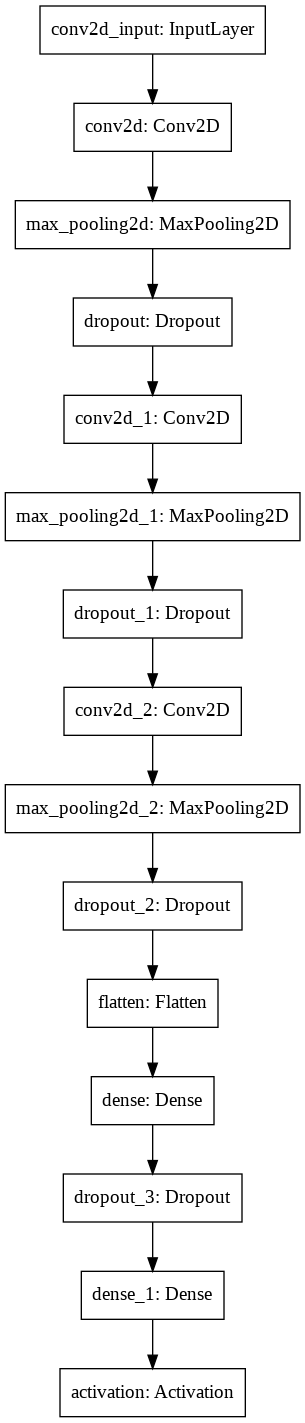

In [32]:
import keras
import tensorflow as tf
tf.keras.utils.plot_model(model,to_file="my_model.png")

**Step-8-Training Our Model**

In [33]:
batch_size=32
epochs=10
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss',score[0])
print('Test Accurcacy',score[1])

Epoch 1/10
176/176 [==============================] - 43s 239ms/step - loss: 0.7035 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4954
Epoch 2/10
176/176 [==============================] - 42s 236ms/step - loss: 0.6930 - accuracy: 0.5132 - val_loss: 0.6896 - val_accuracy: 0.5129
Epoch 3/10
176/176 [==============================] - 41s 234ms/step - loss: 0.6834 - accuracy: 0.5543 - val_loss: 0.6756 - val_accuracy: 0.5812
Epoch 4/10
176/176 [==============================] - 41s 232ms/step - loss: 0.6667 - accuracy: 0.6023 - val_loss: 0.6592 - val_accuracy: 0.6157
Epoch 5/10
176/176 [==============================] - 41s 232ms/step - loss: 0.6424 - accuracy: 0.6385 - val_loss: 0.6379 - val_accuracy: 0.6366
Epoch 6/10
176/176 [==============================] - 41s 231ms/step - loss: 0.6382 - accuracy: 0.6365 - val_loss: 0.6236 - val_accuracy: 0.6524
Epoch 7/10
176/176 [==============================] - 41s 234ms/step - loss: 0.6149 - accuracy: 0.6652 - val_loss: 0.6020 - val_ac

**Step-9-Ploting Our Loss Accuracy Chart**

<function matplotlib.pyplot.show>

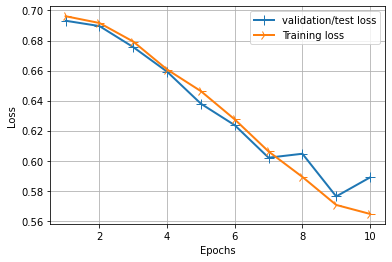

In [34]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='validation/test loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show

<function matplotlib.pyplot.show>

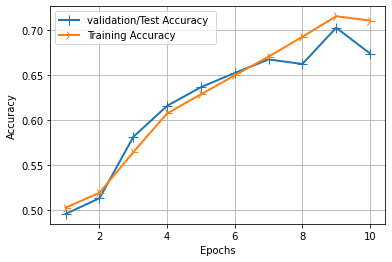

In [35]:
import matplotlib.pyplot as plt
history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values,label='validation/Test Accuracy ')
line2=plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show

In [36]:
history.history

{'accuracy': [0.5024093985557556,
  0.519007682800293,
  0.5641620755195618,
  0.6073532104492188,
  0.6285918354988098,
  0.6496519446372986,
  0.6705336570739746,
  0.692664623260498,
  0.7155095338821411,
  0.7106906771659851],
 'loss': [0.6961709260940552,
  0.6916686296463013,
  0.6792795658111572,
  0.6606894731521606,
  0.6462703943252563,
  0.6274648308753967,
  0.6061162948608398,
  0.5891815423965454,
  0.5705235004425049,
  0.5645517110824585],
 'val_accuracy': [0.4954204857349396,
  0.5129058957099915,
  0.5811823606491089,
  0.6157369017601013,
  0.6365528702735901,
  0.6523730158805847,
  0.6673605442047119,
  0.6623647212982178,
  0.7027477025985718,
  0.6740216612815857],
 'val_loss': [0.6931695342063904,
  0.6896218657493591,
  0.6755909323692322,
  0.6592418551445007,
  0.6379251480102539,
  0.623615562915802,
  0.6019841432571411,
  0.6046172380447388,
  0.5761979818344116,
  0.5888586640357971]}

**Step-10-Save The Model**

In [37]:
model.save('Cat&Dog.h5')
print('model save')

model save


**Step-11-For Upload the Model**

In [41]:
classifier=tf.keras.models.load_model('Cat&Dog.h5')

**Step-12-Test the Model On Test dataset**

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

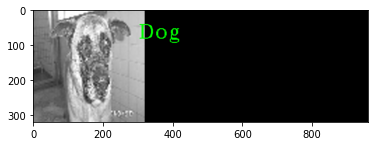

In [42]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img_row,img_height,img_depth=32,32,3
color=True
scale=8
def draw_test(name,res,input_im,scale,img_row,img_height):
  BLACK=[0,0,0]
  res=int(res)
  if res==0:
    pred='Cat'
  if res==1:
    pred='Dog'
  
  expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0]*2,cv2.BORDER_CONSTANT,value=BLACK)
  if color==True:
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_image,str(pred),(300,80),cv2.FONT_HERSHEY_COMPLEX_SMALL,3,(0,255,0),2)
  plt.imshow(expanded_image)

for i in range(0,10):
  rand=np.random.randint(0,len(x_test))
  input_im=x_test[rand]
  imageL=cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
  input_im=input_im.reshape(-1,80,80, 1)

  res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
  draw_test('prediction',res,imageL,scale,img_row,img_height)
  cv2.waitKey(100)

cv2.destroyAllWindows()


In [43]:
!unzip -q "/content/drive/MyDrive/project/Dataset/Cat_Dog_test_Dataset.zip"

In [44]:
# %% [code]
import cv2
import tensorflow as tf

class_category = ["cats","dogs"]


def prepare(filepath):
    IMG_SIZE = 80  # 50 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model('Cat&Dog.h5')

prediction = model.predict([prepare('/content/test_set/cats/cat.4007.jpg')])
print(prediction,'\n')  # will be a list in a list.

print(class_category[int(prediction[0][0])])

[[0. 1.]] 

cats
